In [22]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob
import copy
import cartopy.crs as ccrs

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client(n_workers=2)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 2
Total threads: 8,Total memory: 22.46 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45177,Workers: 2
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 22.46 GiB
Comm: tcp://127.0.0.1:33979,Total threads: 4
Dashboard: /proxy/38991/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:34925,


In [4]:
JRArunoff = xr.open_dataset('/g/data/ik11/inputs/JRA-55/RYF/v1-4/RYF.friver.1990_1991.nc')
ERArunoff = xr.open_dataset('/g/data/e14/rmh561/access-om2/input/ERA-5/RYF/RYF.mror.1990_1991.nc')

In [11]:
JRArun = JRArunoff.friver.sel(time=slice('1900-01-01','1900-02-01')).mean('time').load()

In [12]:
ERArun = ERArunoff.mror.sel(time=slice('1900-01-01','1900-02-01')).mean('time').load()

Text(0.5, 1.0, 'ERA-5 January 1991 Runoff (mror, kgm-2s-1)')

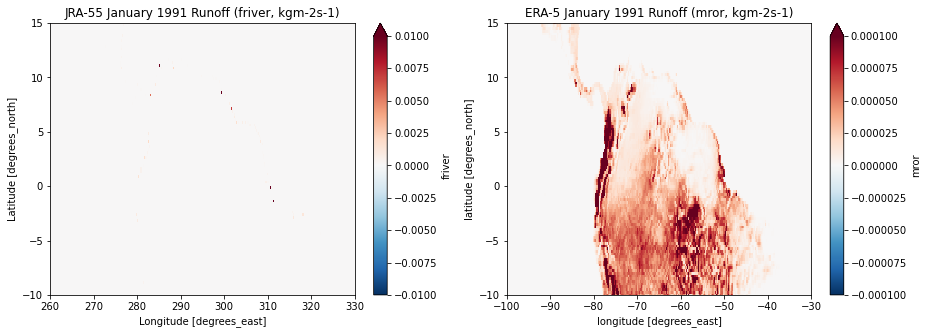

In [39]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
JRArun.plot(ax=ax[0],vmin=-0.01,vmax=0.01,cmap='RdBu_r')
ERArun.plot(ax=ax[1],vmin=-0.0001,vmax=0.0001,cmap='RdBu_r')
ax[0].set_xlim([260.,330.])
ax[0].set_ylim([-10.,15.])
ax[0].set_title('JRA-55 January 1991 Runoff (friver, kgm-2s-1)')
ax[1].set_xlim([260.-360.,330.-360.])
ax[1].set_ylim([-10.,15.])
ax[1].set_title('ERA-5 January 1991 Runoff (mror, kgm-2s-1)')